## Summarize Relationship Task Results

First run [CollectRelationships.ipynb](CollectRelationships.ipynb) to regenerate [results/relationship-analysis.tsv](results/relationship-analysis.tsv)

In [1]:
import numpy as np

In [2]:
import pandas as pd

def compute_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute precision, recall, and F1 score grouped by model_name, method, and ontology.
    
    Parameters:
    - df: DataFrame containing the input data with columns 'model_name', 'method', 'ontology', 'tp', 'fp', 'fn'
    
    Returns:
    - DataFrame with aggregated results.
    """
    
    # Group by 'model_name', 'method', and 'ontology' and aggregate tp, fp, and fn
    grouped = df.groupby(['model_name', 'method', 'ontology']).agg({
        'tp': 'sum',
        'fp': 'sum',
        'fn': 'sum'
    }).reset_index()

    # Calculate precision, recall, and f1 score
    grouped['precision'] = grouped['tp'] / (grouped['tp'] + grouped['fp'])
    grouped['recall'] = grouped['tp'] / (grouped['tp'] + grouped['fn'])
    grouped['f1'] = 2 * (grouped['precision'] * grouped['recall']) / (grouped['precision'] + grouped['recall'])

    return grouped[['model_name', 'method', 'ontology', 'tp', 'fp', 'fn', 'precision', 'recall', 'f1']]


In [3]:
df = pd.read_csv("results/relationship-analysis.tsv", sep="\t")

In [4]:
result_df = compute_metrics(df)

In [5]:
result_df

,model_name,method,ontology,tp,fp,fn,precision,recall,f1
0,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,cl,49,12,64.5,0.803279,0.431718,0.561605
1,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,envo,33,4,27.5,0.891892,0.545455,0.676923
2,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,foodon,30,10,33.0,0.750000,0.476190,0.582524
3,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,go,59,9,48.0,0.867647,0.551402,0.674286
4,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,mondo,35,15,68.0,0.700000,0.339806,0.457516
5,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,oba,66,4,57.5,0.942857,0.534413,0.682171
6,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,obi,27,10,34.5,0.729730,0.439024,0.548223
7,gpt-3.5-turbo,RAG-gpt-3.5-turbo,cl,48,19,66.5,0.716418,0.419214,0.528926
8,gpt-3.5-turbo,RAG-gpt-3.5-turbo,envo,35,9,26.0,0.795455,0.573770,0.666667
9,gpt-3.5-turbo,RAG-gpt-3.5-turbo,foodon,33,12,28.5,0.733333,0.536585,0.619718


In [6]:
result_df.query("model_name=='gpt-4'")

,model_name,method,ontology,tp,fp,fn,precision,recall,f1
17,gpt-4,RAG+background-gpt-4,cl,43,12,63.5,0.781818,0.403756,0.532508
18,gpt-4,RAG+background-gpt-4,envo,35,3,26.0,0.921053,0.573770,0.707071
19,gpt-4,RAG+background-gpt-4,foodon,41,14,23.0,0.745455,0.640625,0.689076
20,gpt-4,RAG+background-gpt-4,go,52,9,43.0,0.852459,0.547368,0.666667
21,gpt-4,RAG+background-gpt-4,mondo,30,21,63.0,0.588235,0.322581,0.416667
22,gpt-4,RAG+background-gpt-4,obi,26,12,35.5,0.684211,0.422764,0.522613
23,gpt-4,RAG-gpt-4,cl,47,7,59.0,0.870370,0.443396,0.587500
24,gpt-4,RAG-gpt-4,envo,41,7,21.5,0.854167,0.656000,0.742081
25,gpt-4,RAG-gpt-4,foodon,40,9,23.0,0.816327,0.634921,0.714286
26,gpt-4,RAG-gpt-4,go,54,7,44.0,0.885246,0.551020,0.679245


In [7]:
result_df.query("method=='RAG-gpt-4'")[["model_name", "ontology", "precision", "recall", "f1"]].\
                                        style.hide().highlight_max(axis=0, props='font-weight:bold').format(precision=3)

model_name,ontology,precision,recall,f1
gpt-4,cl,0.870,0.443,0.588
gpt-4,envo,0.854,0.656,0.742
gpt-4,foodon,0.816,0.635,0.714
gpt-4,go,0.885,0.551,0.679
gpt-4,hp,0.750,0.379,0.503
gpt-4,mondo,0.792,0.382,0.515
gpt-4,mp,0.865,0.587,0.699
gpt-4,oba,0.958,0.538,0.689
gpt-4,obi,0.850,0.553,0.670
gpt-4,uberon,0.644,0.383,0.481


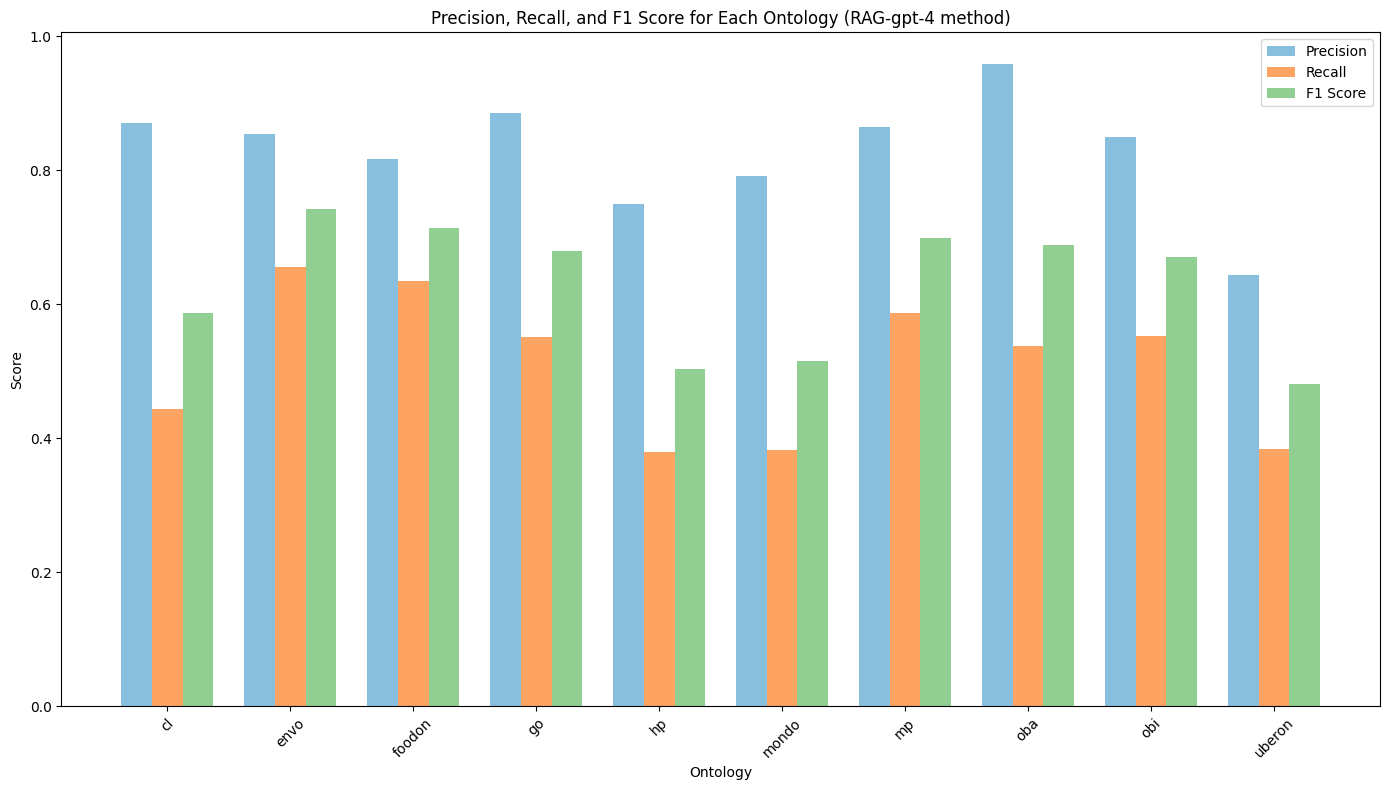

In [26]:
# Importing required libraries
import matplotlib.pyplot as plt

# Adjusting the colors to be less garish
colors = ['#6baed6', '#fd8d3c', '#74c476']

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Set the bar width
bar_width = 0.25

grouped_data = result_df.query("method=='RAG-gpt-4'")[["model_name", "ontology", "precision", "recall", "f1"]]
# Set the index for each ontology
indices = range(len(grouped_data))

# Plot precision bars with adjusted color
rects1 = ax.bar(indices, grouped_data['precision'], bar_width, label='Precision', color=colors[0], alpha=0.8)

# Plot recall bars (shifted by bar_width) with adjusted color
rects2 = ax.bar([i + bar_width for i in indices], grouped_data['recall'], bar_width, label='Recall', color=colors[1], alpha=0.8)

# Plot F1 score bars (shifted by 2*bar_width) with adjusted color
rects3 = ax.bar([i + 2*bar_width for i in indices], grouped_data['f1'], bar_width, label='F1 Score', color=colors[2], alpha=0.8)

# Set the title and labels
ax.set_xlabel('Ontology')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score for Each Ontology (RAG-gpt-4 method)')
ax.set_xticks([i + bar_width for i in indices])
ax.set_xticklabels(grouped_data['ontology'])
ax.legend()

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("results/relationships-gpt4.png")
plt.show()


In [8]:
isa_df = pd.read_csv("results/relationship-analysis-isa.tsv", sep="\t")
#isa_df

In [9]:
isa_metrics = compute_metrics(isa_df)
#isa_metrics

In [32]:
#isa_metrics = compute_metrics(isa_df)
owl2vec_compare = isa_metrics.query("(ontology == 'go' or ontology=='foodon') and method in ['RAG-gpt-4', 'RAG-gpt-3.5-turbo', 'RAG-nous-hermes-13b']")[["model_name", "method", "ontology", "precision"]]
owl2vec_compare

,model_name,method,ontology,precision
9,gpt-3.5-turbo,RAG-gpt-3.5-turbo,foodon,0.838710
10,gpt-3.5-turbo,RAG-gpt-3.5-turbo,go,0.964286
25,gpt-4,RAG-gpt-4,foodon,0.941176
26,gpt-4,RAG-gpt-4,go,0.885714
35,nous-hermes-13b,RAG-nous-hermes-13b,foodon,0.809524
36,nous-hermes-13b,RAG-nous-hermes-13b,go,0.642857


In [36]:
rows = [{
  "method": "owl2vec*",
  "ontology": "foodon",
  "precision": 0.143,
},{
    "method": "owl2vec*",
    "ontology": "go",
    "precision": 0.076
},
       {
  "method": "rdf2vec",
  "ontology": "foodon",
  "precision": 0.053,
},{
    "method": "rdf2vec",
    "ontology": "go",
    "precision": 0.017
}
       ]

owl2vec_compare2 = pd.concat([pd.DataFrame(rows), owl2vec_compare])
subset = owl2vec_compare2.select_dtypes(include=[np.number]).columns
owl2vec_compare2.style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

method,ontology,precision,model_name
owl2vec*,foodon,0.143,nan
owl2vec*,go,0.076,nan
rdf2vec,foodon,0.053,nan
rdf2vec,go,0.017,nan
RAG-gpt-3.5-turbo,foodon,0.839,gpt-3.5-turbo
RAG-gpt-3.5-turbo,go,0.964,gpt-3.5-turbo
RAG-gpt-4,foodon,0.941,gpt-4
RAG-gpt-4,go,0.886,gpt-4
RAG-nous-hermes-13b,foodon,0.810,nous-hermes-13b
RAG-nous-hermes-13b,go,0.643,nous-hermes-13b


In [37]:
precision_pivot = owl2vec_compare2.pivot_table(index='method', columns='ontology', values='precision', aggfunc='mean').reset_index()
subset = precision_pivot.select_dtypes(include=[np.number]).columns
precision_pivot.sort_values("foodon").style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

method,foodon,go
rdf2vec,0.053,0.017
owl2vec*,0.143,0.076
RAG-nous-hermes-13b,0.810,0.643
RAG-gpt-3.5-turbo,0.839,0.964
RAG-gpt-4,0.941,0.886


In [38]:
#pivoted_owl2vec_compare = owl2vec_compare2.set_index(['ontology']).unstack('ontology')
#subset = pivoted_owl2vec_compare.select_dtypes(include=[np.number]).columns
#pivoted_owl2vec_compare.sort_values(by=('ontology', 'precision'))
#pivoted_owl2vec_compare.sort_values(by=('precision', 'ontology'))
#pivoted_owl2vec_compare

In [14]:
#pivoted_owl2vec_compare.style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

In [15]:
isa_metrics.query("model_name=='gpt-4'")

,model_name,method,ontology,tp,fp,fn,precision,recall,f1
17,gpt-4,RAG+background-gpt-4,cl,25,2,36.0,0.925926,0.409836,0.568182
18,gpt-4,RAG+background-gpt-4,envo,31,1,16.0,0.968750,0.659574,0.784810
19,gpt-4,RAG+background-gpt-4,foodon,31,3,22.0,0.911765,0.584906,0.712644
20,gpt-4,RAG+background-gpt-4,go,27,2,30.0,0.931034,0.473684,0.627907
21,gpt-4,RAG+background-gpt-4,mondo,17,7,52.0,0.708333,0.246377,0.365591
22,gpt-4,RAG+background-gpt-4,obi,24,0,28.5,1.000000,0.457143,0.627451
23,gpt-4,RAG-gpt-4,cl,27,1,34.5,0.964286,0.439024,0.603352
24,gpt-4,RAG-gpt-4,envo,36,2,12.5,0.947368,0.742268,0.832370
25,gpt-4,RAG-gpt-4,foodon,32,2,22.0,0.941176,0.592593,0.727273
26,gpt-4,RAG-gpt-4,go,31,4,31.0,0.885714,0.500000,0.639175


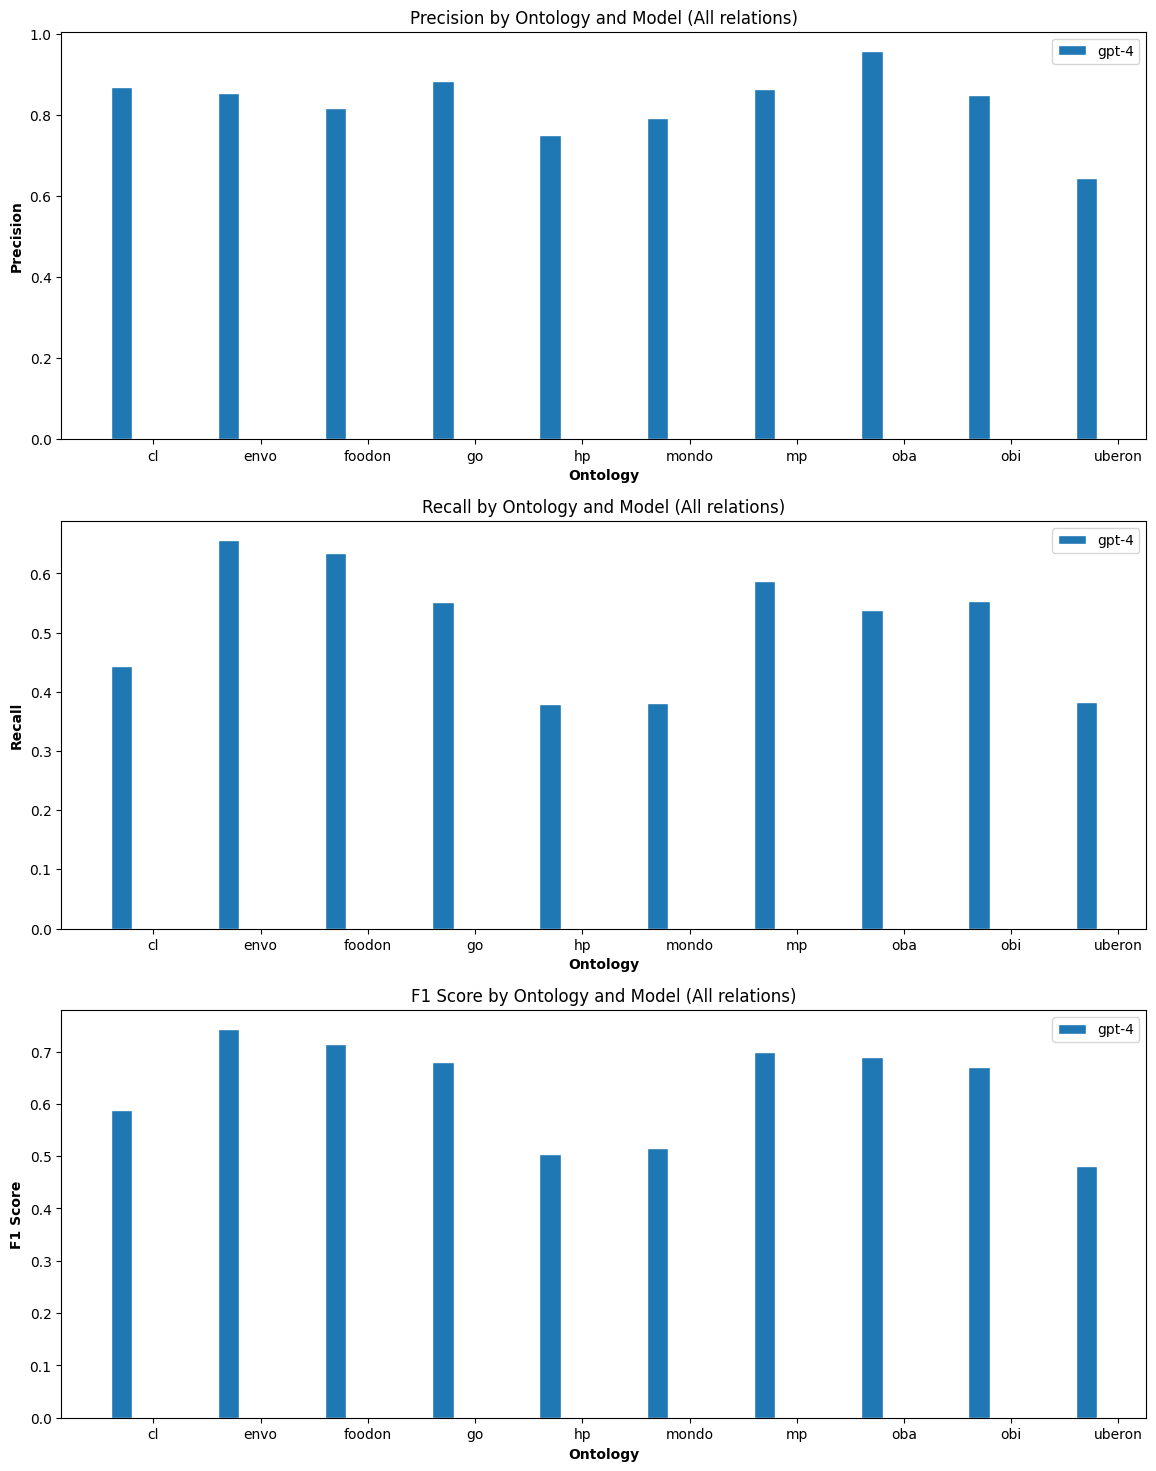

In [16]:
import matplotlib.pyplot as plt

#result_df = metrics




def plot_metrics(rag_data, context="All relations"):

    # List of models and ontologies
    models = rag_data['model_name'].unique()
    ontologies = rag_data['ontology'].unique()
    
    # Set up bar width and positions
    bar_width = 0.2
    r = range(len(ontologies))
    positions = [i for i in r]
    
    # Create the grouped bar chart for each metric
    metrics = ['precision', 'recall', 'f1']
    titles = ['Precision', 'Recall', 'F1 Score']
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))
    
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        for idx, model in enumerate(models):
            values = rag_data[rag_data['model_name'] == model][metric].values
            axes[i].bar([p + idx * bar_width for p in positions], values, width=bar_width, label=model, edgecolor='white')
            
        axes[i].set_xlabel('Ontology', fontweight='bold')
        axes[i].set_ylabel(title, fontweight='bold')
        axes[i].set_title(f'{title} by Ontology and Model ({context})')
        axes[i].set_xticks([p + 1.5 * bar_width for p in positions])
        axes[i].set_xticklabels(ontologies)
        axes[i].legend()
    
    #plt.tight_layout()
    plt.savefig("results/relation-eval.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()


# Filter the data for method == 'RAG'
plot_metrics(result_df[result_df['method'] == 'RAG-gpt-4'])

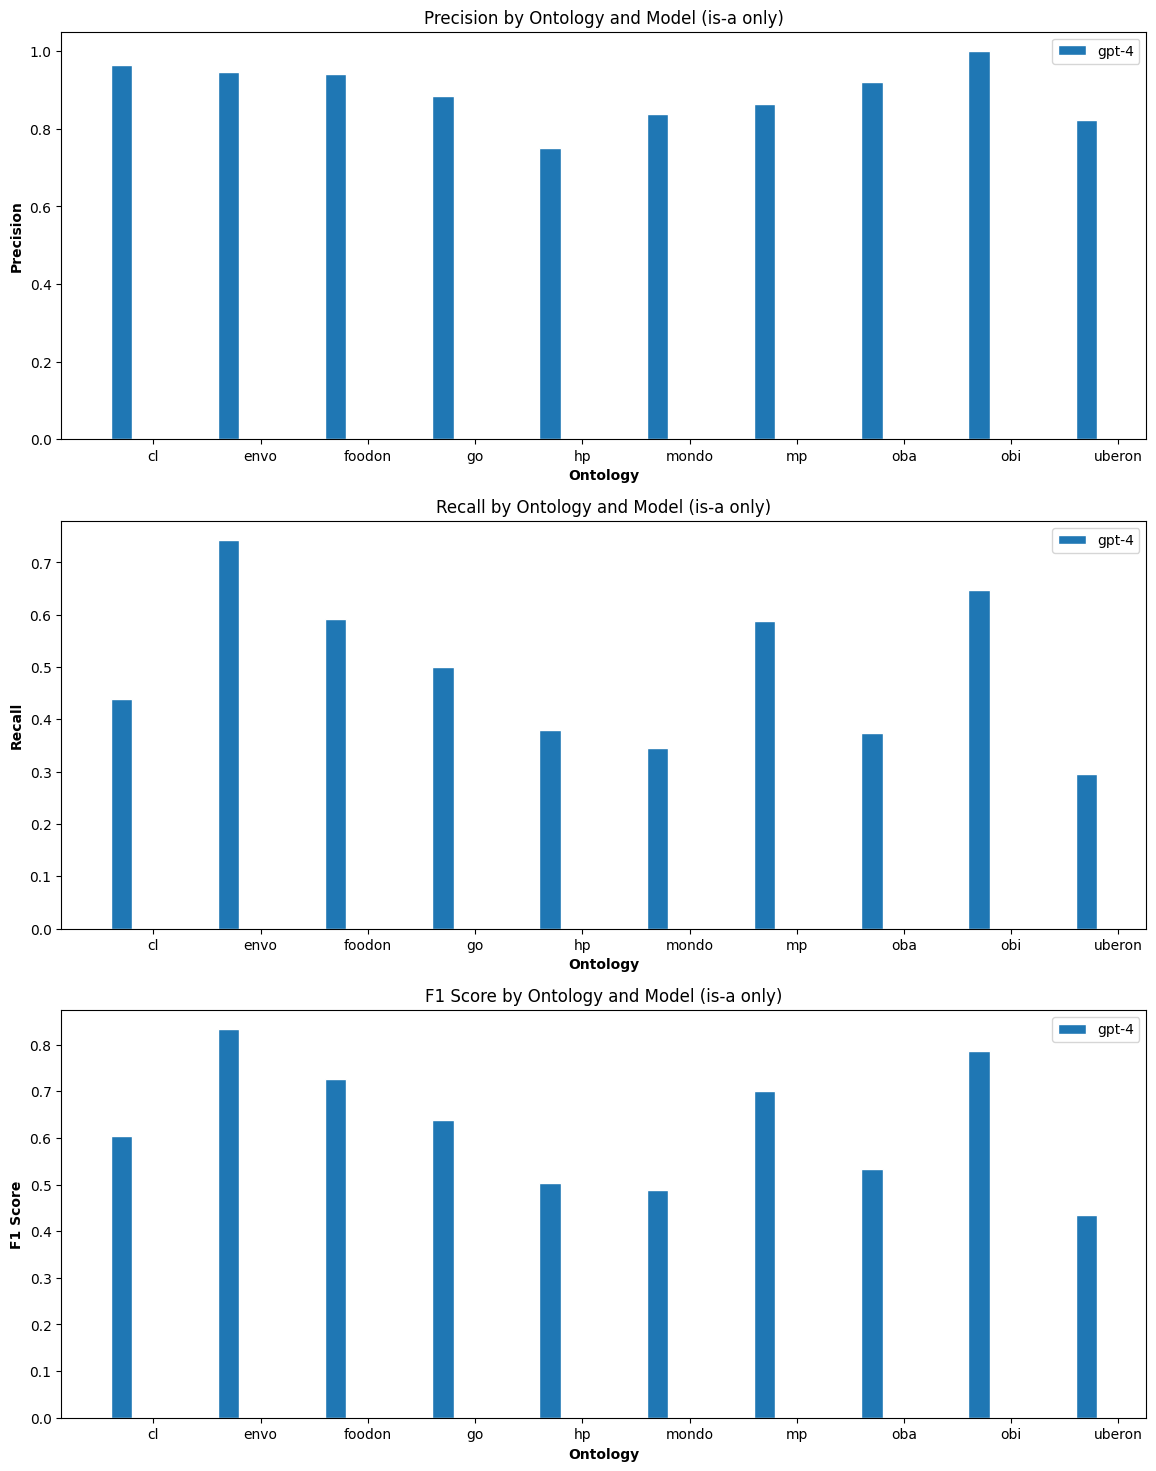

In [17]:
plot_metrics(isa_metrics[isa_metrics['method'] == 'RAG-gpt-4'], context="is-a only")

In [18]:
def group_all(df):
    # Group by 'model_name' and 'method' using the correct columns for aggregation
    grouped_data_corrected = df.groupby(['model_name', 'method']).agg({
        'tp': 'sum',
        'fp': 'sum',
        'fn': 'sum'
    }).reset_index()
    
    # Calculate precision, recall, and f1 score
    grouped_data_corrected['precision'] = grouped_data_corrected['tp'] / (grouped_data_corrected['tp'] + grouped_data_corrected['fp'])
    grouped_data_corrected['recall'] = grouped_data_corrected['tp'] / (grouped_data_corrected['tp'] + grouped_data_corrected['fn'])
    grouped_data_corrected['f1'] = 2 * (grouped_data_corrected['precision'] * grouped_data_corrected['recall']) / (grouped_data_corrected['precision'] + grouped_data_corrected['recall'])
    
    # Select the relevant columns for display
    grouped_data_corrected = grouped_data_corrected[['model_name', 'method', 'tp', 'fp', 'fn', 'precision', 'recall', 'f1']]
    
    return grouped_data_corrected

grouped_data_corrected = group_all(df)
grouped_data_corrected

,model_name,method,tp,fp,fn,precision,recall,f1
0,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,299,64,333.0,0.823691,0.473101,0.601005
1,gpt-3.5-turbo,RAG-gpt-3.5-turbo,371,97,446.0,0.792735,0.454100,0.577432
2,gpt-4,RAG+background-gpt-4,227,71,254.0,0.761745,0.471933,0.582798
3,gpt-4,RAG-gpt-4,437,96,451.5,0.819887,0.491840,0.614843
4,nous-hermes-13b,RAG-nous-hermes-13b,276,146,524.5,0.654028,0.344785,0.451534


In [19]:
import numpy as np
subset = grouped_data_corrected.select_dtypes(include=[np.number]).columns
grouped_data_corrected.style.highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

,model_name,method,tp,fp,fn,precision,recall,f1
0,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,299,64,333.000,0.824,0.473,0.601
1,gpt-3.5-turbo,RAG-gpt-3.5-turbo,371,97,446.000,0.793,0.454,0.577
2,gpt-4,RAG+background-gpt-4,227,71,254.000,0.762,0.472,0.583
3,gpt-4,RAG-gpt-4,437,96,451.500,0.820,0.492,0.615
4,nous-hermes-13b,RAG-nous-hermes-13b,276,146,524.500,0.654,0.345,0.452


In [20]:
grouped_data_corrected.query("method=='RAG-gpt-4'")

,model_name,method,tp,fp,fn,precision,recall,f1
3,gpt-4,RAG-gpt-4,437,96,451.5,0.819887,0.49184,0.614843


In [21]:
#grouped_data_corrected.query("method=='RAG-gpt-4'").drop("method", axis=1).\
#style.hide().highlight_max(subset=subset, axis=0, props='font-weight:bold').format(precision=3)

In [22]:
group_all(isa_df)

,model_name,method,tp,fp,fn,precision,recall,f1
0,gpt-3.5-turbo,RAG+background-gpt-3.5-turbo,191,20,262.0,0.905213,0.421634,0.575301
1,gpt-3.5-turbo,RAG-gpt-3.5-turbo,247,39,361.5,0.863636,0.405916,0.552264
2,gpt-4,RAG+background-gpt-4,155,15,184.5,0.911765,0.456554,0.608440
3,gpt-4,RAG-gpt-4,299,34,345.5,0.897898,0.463926,0.611765
4,nous-hermes-13b,RAG-nous-hermes-13b,183,72,406.5,0.717647,0.310433,0.433393
